In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# nltk 자연어 처리 패키지
from nltk.tokenize import word_tokenize   # 토큰화(문장을 최소 단위로 분리.. 단어)
from nltk.corpus import stopwords        # 불용어  단어가 아닌 접두사 전치사 기타..
from nltk.stem import WordNetLemmatizer  # 표제어 추출 - 단어를 일반화 시제 등...
from collections import Counter          # 데이터 집합에서 개수를 자동으로 계산
import matplotlib.pylab as plt
from wordcloud import STOPWORDS, WordCloud    # 워드클라우를 그리기위해 사용하는 불용어, 
from functools import reduce

In [5]:
url = 'https://raw.githubusercontent.com/leekyuyoung20221226/python/main/data/ai.csv'
df = pd.read_csv(url,index_col=0)
df.head()

,제목,저자,출판사,출판일
0,Future Trends of AI-based Smart Systems and Se...,이대원,한국정보처리학회,2019
1,Future Trends of AI-Based Smart Systems and Se...,"Lee, Daewon",Korea Information Processing Society,2019
2,Consciousness and Intentionality in AI and the...,Michael Jin Choi(최진),한국신학정보연구원,2016
3,A Study on the Use of AI-based Learning Progra...,김혜숙,한국영어학회,2022
4,Influence of hCG Administration after AI on Co...,Hyun-Joo Lim,한국동물생명공학회(구 한국동물번식학회),2018


In [11]:
# 제목데이터중에서 필요없는 데이터를 전처리
all_title = df['제목']
stopWord = set(stopwords.words("english"))  # 불용어
lemma = WordNetLemmatizer()

In [21]:
words = []
print(all_title[0])
print (re.sub(r"[^a-zA-Z]+"," ",all_title[0]))

Future Trends of AI-based Smart Systems and Services: Challenges, Opportunities, and Solutions
Future Trends of AI based Smart Systems and Services Challenges Opportunities and Solutions


In [22]:
re.sub(r"[^a-zA-Z]+"," ","mjaiwehnoifndksan;ofae2175524153#$#%$^#$$dfvsdvds#$@$@#%")

'mjaiwehnoifndksan ofae dfvsdvds '

In [26]:
for title in  all_title:
    word =  re.sub(r"[^a-zA-Z]+"," ",title)
    wordToken = word_tokenize( word.lower() )
    wordTokenStopWord = [i for i in wordToken if i not in stopWord]
    wordTokenStopWordLemma =  [lemma.lemmatize(w) for w in wordTokenStopWord]
    words.append(wordTokenStopWordLemma)

In [27]:
# 기능확인
# temp = word_tokenize( re.sub(r"[^a-zA-Z]+"," ",all_title[0]) )
# [i for i in temp if i not in stopWord]

In [34]:
words[:2] # 차수가 2차원  2dim

[['future',
  'trend',
  'ai',
  'based',
  'smart',
  'system',
  'service',
  'challenge',
  'opportunity',
  'solution'],
 ['future',
  'trend',
  'ai',
  'based',
  'smart',
  'system',
  'service',
  'challenge',
  'opportunity',
  'solution']]

In [36]:
word2 = reduce(lambda x,y : x+y, words)
word2[:6]

['future', 'trend', 'ai', 'based', 'smart', 'system']

In [38]:
# 리스트의 빈도수를 확인 Counter
count = Counter(word2)
count

Counter({'future': 8,
         'trend': 7,
         'ai': 330,
         'based': 102,
         'smart': 4,
         'system': 31,
         'service': 19,
         'challenge': 8,
         'opportunity': 4,
         'solution': 9,
         'consciousness': 2,
         'intentionality': 2,
         'imago': 2,
         'dei': 2,
         'study': 45,
         'use': 6,
         'learning': 18,
         'program': 8,
         'efl': 8,
         'student': 11,
         'different': 3,
         'type': 5,
         'teacher': 4,
         'support': 4,
         'influence': 4,
         'hcg': 1,
         'administration': 1,
         'conception': 1,
         'rate': 1,
         'serum': 1,
         'progesterone': 1,
         'concentration': 1,
         'dairy': 1,
         'cattle': 1,
         'vessel': 5,
         'traffic': 2,
         'geometric': 1,
         'probability': 1,
         'approach': 6,
         'data': 20,
         'active': 1,
         'shipping': 1,
         'lane': 1,

In [44]:
# pd.DataFrame(word2).value_counts().to_dict()

In [49]:
# 단어의 글자수가 1보다 큰 단어만 취급
df = pd.DataFrame(count.most_common(50),columns=['world','count'])
df.head()

,world,count
0,ai,330
1,based,102
2,study,45
3,using,40
4,system,31


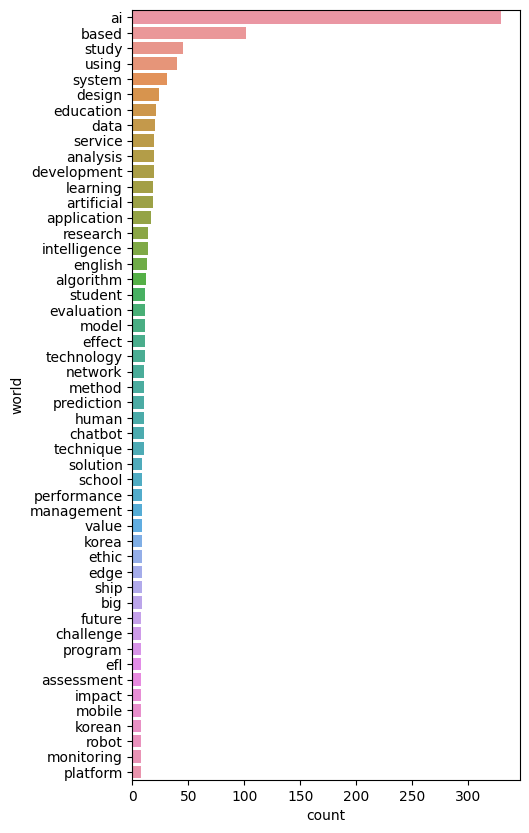

In [56]:
# plt.bar(df['world'],df['count'])
plt.figure(figsize=(5,10))
sns.barplot(data=df, y='world', x='count')
plt.show()

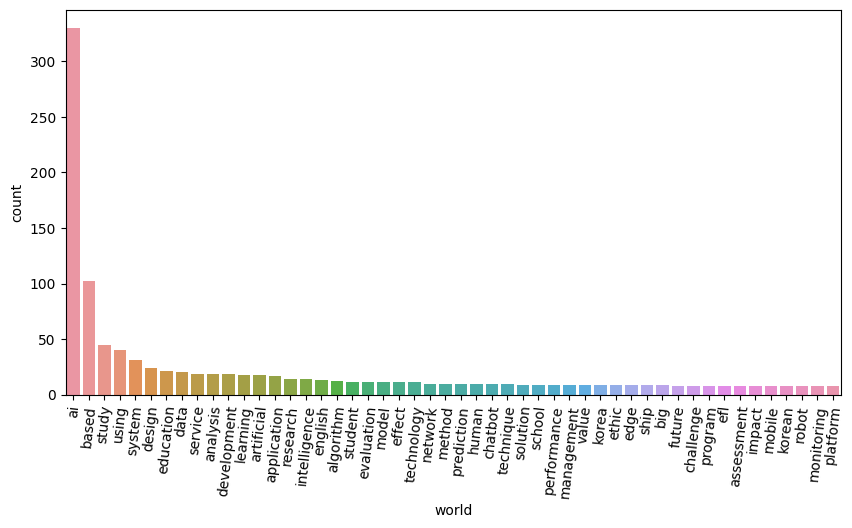

In [65]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='world', y='count')
plt.xticks(rotation=84)
plt.show()

In [63]:
help(sns.barplot)

Help on function barplot in module seaborn.categorical:

barplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, errcolor='.26', errwidth=None, capsize=None, dodge=True, ci='deprecated', ax=None, **kwargs)
    Show point estimates and errors as rectangular bars.
    
    A bar plot represents an estimate of central tendency for a numeric
    variable with the height of each rectangle and provides some indication of
    the uncertainty around that estimate using error bars. Bar plots include 0
    in the quantitative axis range, and they are a good choice when 0 is a
    meaningful value for the quantitative variable, and you want to make
    comparisons against it.
    
    For datasets where 0 is not a meaningful value, a point plot will allow you
    to focus on differences between levels of one or more categorical
    varia